<a href="https://colab.research.google.com/github/codedmachine111/ML/blob/master/CIFAR_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import pandas as pd
import os
import glob

In [2]:
!pip install opendatasets -q
import opendatasets as od
od.download('https://www.kaggle.com/competitions/cifar-10/data')

100%|██████████| 715M/715M [00:08<00:00, 91.4MB/s]



Extracting archive ./cifar-10/cifar-10.zip to ./cifar-10


In [3]:
!pip install py7zr -q
import py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 28.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 12.2 MB/s eta 0:00:00


## Loading the data

In [4]:
data = pd.read_csv('/content/cifar-10/trainLabels.csv')
data

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


In [5]:
labels = []
for i in data['label'].unique():
  labels.append(i)

labels

['frog',
 'truck',
 'deer',
 'automobile',
 'bird',
 'horse',
 'ship',
 'cat',
 'dog',
 'airplane']

In [6]:
data['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

### Unzipping the training file

In [8]:
if not len(glob.glob('/content/cifar-10/train/*.png')):
  with py7zr.SevenZipFile('/content/cifar-10/train.7z', mode='r') as z:
    z.extractall()

In [9]:
os.listdir('/content/cifar-10/train')[:5]

['5706.png', '25750.png', '41412.png', '41464.png', '43516.png']

In [10]:
os.listdir('/content/cifar-10/train')[0].split('.')[0]

'5706'

In [11]:
def load_images_ids(image_dir):
  filenames = os.listdir(image_dir)
  list_of_images = []
  image_ids =[]
  for f in filenames:
    image_id = f.split('.')[0]
    image_ids.append(image_id)

    data_array = cv2.imread('/content/cifar-10/train/'+f)
    list_of_images.append(data_array)

  X = np.array(list_of_images)

  return X, image_ids

In [12]:
X_train, train_img_ids = load_images_ids('/content/cifar-10/train/')

In [13]:
X_train.shape

(50000, 32, 32, 3)

In [14]:
# Getting training labels and converting them to 0-9 codes

img_codes = [labels.index(data.loc[int(img_id) - 1]['label']) for img_id in train_img_ids]
y_train = np.array(img_codes)
y_train.shape

(50000,)

In [15]:
X_train[0]

array([[[119, 163, 179],
        [107, 150, 170],
        [ 91, 131, 144],
        ...,
        [ 72,  56, 147],
        [ 83,  82, 128],
        [ 70,  53, 181]],

       [[123, 159, 178],
        [105, 145, 165],
        [ 95, 132, 144],
        ...,
        [ 72,  62, 151],
        [ 85,  79, 125],
        [ 72,  50, 177]],

       [[124, 159, 179],
        [101, 146, 166],
        [ 98, 135, 147],
        ...,
        [ 79,  64, 151],
        [ 90,  68, 116],
        [ 69,  44, 170]],

       ...,

       [[ 43, 102, 153],
        [ 49, 117, 167],
        [ 57, 124, 177],
        ...,
        [ 24,  43, 108],
        [ 20,  39, 102],
        [ 18,  36,  97]],

       [[ 36,  81, 140],
        [ 44,  98, 153],
        [ 43, 109, 163],
        ...,
        [ 20,  49, 121],
        [ 24,  51, 123],
        [ 25,  51, 122]],

       [[ 29,  72, 138],
        [ 34,  83, 144],
        [ 40,  95, 155],
        ...,
        [ 21,  45, 117],
        [ 25,  47, 119],
        [ 27,  46, 120]]

In [16]:
# Normalizing the training images

X_train = X_train / 255.0

In [36]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

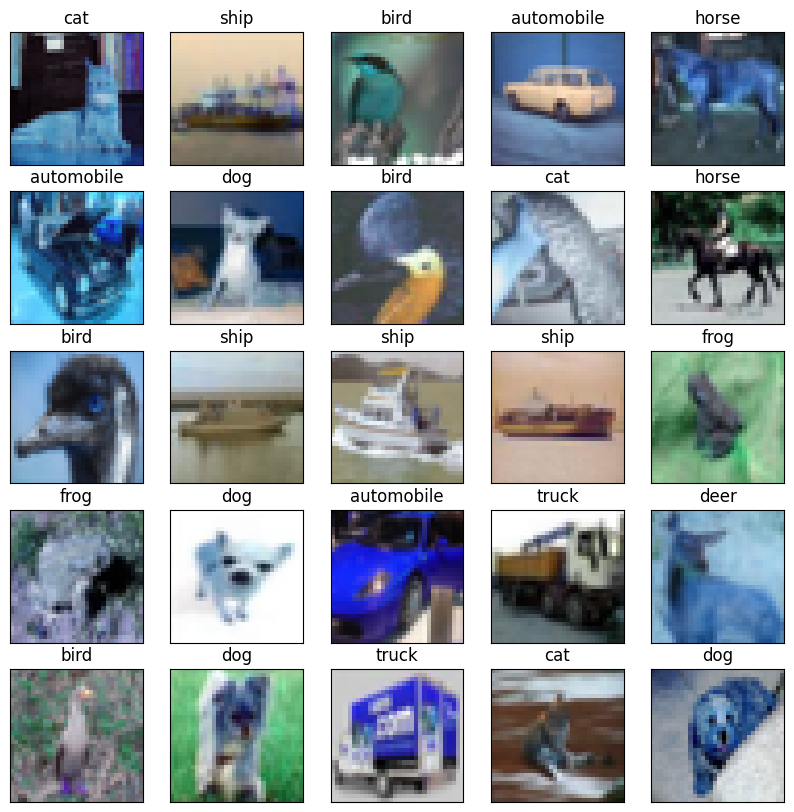

In [17]:
# Visualizing the training data

fig, axes = plt.subplots(5,5, figsize=(10,10))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(X_train[i])
  ax.set_title(f'{labels[y_train[i]]}')
  ax.set_xticks([])
  ax.set_yticks([])

plt.show()

### Augmenting the training data

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    horizontal_flip = True,
    rotation_range=10,
    channel_shift_range=0.05,
    validation_split=0.15,
)

training_data = datagen.flow(X_train, y_train, subset='training', shuffle=True)
validation_data = datagen.flow(X_train, y_train, subset='validation', shuffle=False)

## Building a CNN

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Dense, Flatten

In [83]:
model = Sequential()

# INPUT LAYER
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# HIDDEN LAYER 1
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# HIDDEN LAYER 2
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# OUTPUT LAYER
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 conv2d_31 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 conv2d_33 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 

In [84]:
# Compile the model

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, epsilon=1e-06), loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
# Callbacks during training

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [37]:
# Fitting and training the model

history = model.fit(training_data,
                    validation_split=0.1,
                    validation_data=validation_data,
                    epochs=70,
                    verbose=1,)

Epoch 1/70
1329/1329 [==============================] - 53s 37ms/step - loss: 1.7074 - accuracy: 0.3696 - val_loss: 1.4327 - val_accuracy: 0.4748
Epoch 2/70
1329/1329 [==============================] - 51s 38ms/step - loss: 1.2643 - accuracy: 0.5414 - val_loss: 1.1371 - val_accuracy: 0.5981
Epoch 3/70
1329/1329 [==============================] - 50s 37ms/step - loss: 1.0493 - accuracy: 0.6272 - val_loss: 0.9994 - val_accuracy: 0.6557
Epoch 4/70
1329/1329 [==============================] - 54s 40ms/step - loss: 0.9284 - accuracy: 0.6748 - val_loss: 0.9260 - val_accuracy: 0.6733
Epoch 5/70
1329/1329 [==============================] - 50s 38ms/step - loss: 0.8411 - accuracy: 0.7054 - val_loss: 0.8995 - val_accuracy: 0.6907
Epoch 6/70
1329/1329 [==============================] - 51s 38ms/step - loss: 0.7808 - accuracy: 0.7267 - val_loss: 0.8488 - val_accuracy: 0.7044
Epoch 7/70
1329/1329 [==============================] - 49s 37ms/step - loss: 0.7352 - accuracy: 0.7427 - val_loss: 0.8101 -

In [38]:
# Saving the model

model.save('/content/models/cifar10-cnn.h5')

In [23]:
### loading the saved mode

loaded_model = tf.keras.saving.load_model('/content/cifar10-cnn.h5')

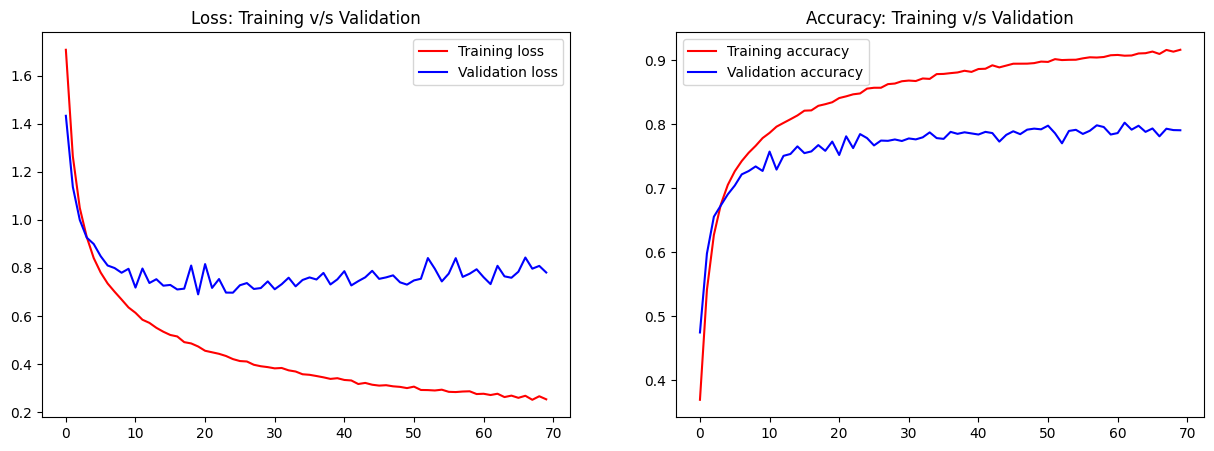

In [42]:
# visualizing the results

fig, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].plot(history.history['loss'], label='Training loss', color='red')
axes[0].plot(history.history['val_loss'], label='Validation loss', color='blue')
axes[0].set_title('Loss: Training v/s Validation')
legend = axes[0].legend(loc='best')

axes[1].plot(history.history['accuracy'], label='Training accuracy', color='red')
axes[1].plot(history.history['val_accuracy'], label='Validation accuracy', color='blue')
axes[1].set_title('Accuracy: Training v/s Validation')
legend = axes[1].legend(loc='best');

## Evaluating the model

- Since the test images folder takes a very long time to unzip, we will use dataset provided by keras on CIFAR-10

In [90]:
# Loading data using keras dataset

(X_train_df, y_train_df), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
X_train_df.shape, y_train_df.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [91]:
# Normalize and reshape the data
X_train_df = X_train_df.reshape(X_train_df.shape[0], X_train_df.shape[1], X_train_df.shape[2], 3)
X_train_df = X_train_df/ 255.0
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 3)
X_test=X_test / 255.0

In [92]:
y_train_df = y_train_df.flatten()
y_test = y_test.flatten()
y_train_df.shape, y_test.shape

((50000,), (10000,))

In [93]:
y_train_df = tf.one_hot(y_train_df.astype(np.int32), depth=10)
y_test = tf.one_hot(y_test.astype(np.int32), depth=10)
y_train_df.shape, y_test.shape

(TensorShape([50000, 10]), TensorShape([10000, 10]))

In [94]:
X_train_df.shape, y_train_df.shape

((50000, 32, 32, 3), TensorShape([50000, 10]))

In [110]:
y_train_df[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

In [111]:
y_train[0]

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)>

In [100]:
model = Sequential()

# INPUT LAYER
model.add(Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# HIDDEN LAYER 1
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# HIDDEN LAYER 2
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# OUTPUT LAYER
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 32, 32, 64)        4864      
                                                                 
 conv2d_43 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 conv2d_45 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 8, 8, 128)        0         
 g2D)                                                 

In [101]:
# Compile the model

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, epsilon=1e-06), loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
history_df = model.fit(X_train_df, y_train_df, validation_split=0.1, epochs=50, batch_size=32)

Epoch 1/50
1407/1407 [==============================] - 17s 11ms/step - loss: 1.8437 - accuracy: 0.3276 - val_loss: 1.8322 - val_accuracy: 0.3516
Epoch 2/50
1407/1407 [==============================] - 14s 10ms/step - loss: 1.4612 - accuracy: 0.4740 - val_loss: 1.4650 - val_accuracy: 0.4622
Epoch 3/50
1407/1407 [==============================] - 15s 11ms/step - loss: 1.2933 - accuracy: 0.5391 - val_loss: 1.4101 - val_accuracy: 0.4974
Epoch 4/50
1407/1407 [==============================] - 15s 10ms/step - loss: 1.1553 - accuracy: 0.5920 - val_loss: 1.1149 - val_accuracy: 0.6104
Epoch 5/50
1407/1407 [==============================] - 15s 10ms/step - loss: 1.0412 - accuracy: 0.6338 - val_loss: 1.0923 - val_accuracy: 0.6176
Epoch 6/50
1407/1407 [==============================] - 14s 10ms/step - loss: 0.9427 - accuracy: 0.6715 - val_loss: 1.0201 - val_accuracy: 0.6488
Epoch 7/50
1407/1407 [==============================] - 15s 11ms/step - loss: 0.8560 - accuracy: 0.7017 - val_loss: 0.9421 -

In [103]:
model.save('/content/models/cifar10-df-model.h5')

In [104]:
loss, acc = model.evaluate(X_test, y_test)
loss, acc

313/313 [==============================] - 1s 5ms/step - loss: 2.5664 - accuracy: 0.7349


(2.5664193630218506, 0.7348999977111816)

In [105]:
y_preds = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [106]:
y_preds = np.argmax(y_preds, axis=1)
y_preds[:10], y_preds.shape

(array([3, 8, 8, 0, 4, 6, 3, 4, 3, 1]), (10000,))

In [107]:
y_test = np.argmax(y_test, axis=1)
y_test[:10], y_test.shape

(array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1]), (10000,))

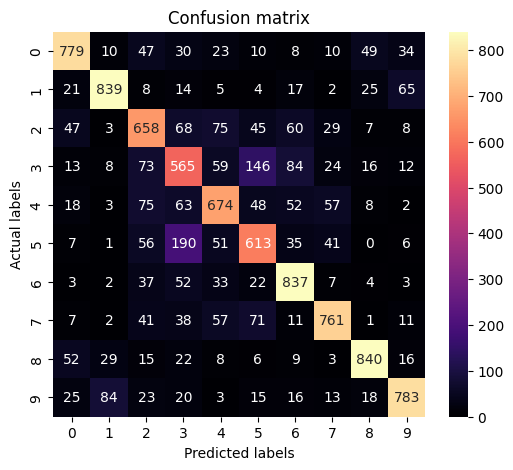

In [108]:
from tensorflow.math import confusion_matrix

plt.figure(figsize=(6,5))
cm = confusion_matrix(y_test, y_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='magma')

plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion matrix');